<a href="https://colab.research.google.com/github/stepheodhiambo2000/BUSINESS-ANALYST/blob/main/SVM_implementation_with_Diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/diabetes.csv')
df.head(5)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [10]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [12]:
# Select only numeric columns, excluding the target 'liked'
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'liked' in numeric_cols:
    numeric_cols.remove('liked')

# Replace zero values with the mean in each selected column
for col in numeric_cols:
    df[col] = df[col].replace(0, df[col].mean())

# Display the updated DataFrame head to show changes
display(df.head())

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,tested_positive
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,tested_negative
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,tested_positive
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,tested_negative
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,tested_positive


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42) # Using a linear kernel for simplicity
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy:.2f}")

Accuracy of the SVM model: 0.76


In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [15]:
from sklearn.metrics import classification_report

# Generate and print the classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

tested_negative       0.80      0.84      0.82        99
tested_positive       0.68      0.62      0.65        55

       accuracy                           0.76       154
      macro avg       0.74      0.73      0.73       154
   weighted avg       0.76      0.76      0.76       154



Hypeparameter **Tuning**

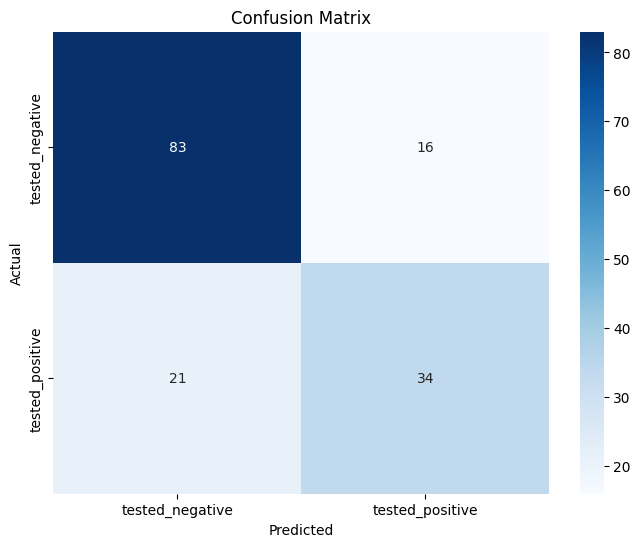

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the class labels
class_labels = svm_model.classes_

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Task
Perform hyperparameter tuning for the Support Vector Machine model using the diabetes dataset located at "/content/sample_data/diabetes.csv".

## Import necessary libraries

### Subtask:
Import `GridSearchCV` from `sklearn.model_selection` and `SVC` from `sklearn.svm`.


**Reasoning**:
Import the required classes for hyperparameter tuning.



In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

## Define the parameter grid

### Subtask:
Specify the hyperparameters and their possible values that you want to tune (e.g., `C`, `kernel`, `gamma`).


**Reasoning**:
Create a dictionary `param_grid` containing the hyperparameters and their possible values for tuning the SVM model, as specified in the instructions.



In [30]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

## Initialize gridsearchcv

### Subtask:
Create a `GridSearchCV` object with the SVM model, parameter grid, and cross-validation strategy.


**Reasoning**:
Instantiate an SVC model and a GridSearchCV object with the defined parameter grid and cross-validation strategy.



In [31]:
# Instantiate an SVC model
svm = SVC(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5)

## Fit gridsearchcv

### Subtask:
Train the `GridSearchCV` object on the training data to find the best parameters.


**Reasoning**:
Train the GridSearchCV object on the training data to find the best parameters.



In [33]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

## Get the best parameters and best score

### Subtask:
Access the best parameters found by the search and the corresponding cross-validation score.


**Reasoning**:
Access and print the best parameters and the best cross-validation score from the trained GridSearchCV object.



In [34]:
# Access the best parameters found by the search
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Access the best cross-validation score
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

Best parameters found: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.7687325069972012


## Evaluate the model with the best parameters

### Subtask:
Train a new SVM model using the best parameters on the training data and evaluate its performance on the test set.


**Reasoning**:
Initialize a new SVM model with the best parameters, train it on the training data, make predictions on the test set, and calculate the accuracy.



In [35]:
# Initialize a new Support Vector Machine model using the best parameters
svm_model_tuned = SVC(random_state=42)
svm_model_tuned.set_params(**best_params)

# Train this new SVM model on the training data
svm_model_tuned.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = svm_model_tuned.predict(X_test)

# Calculate the accuracy of the model's predictions on the test set
accuracy_tuned = accuracy_score(y_test, y_pred_best)

# Print the calculated test accuracy
print(f"Accuracy of the tuned SVM model on the test set: {accuracy_tuned:.2f}")

Accuracy of the tuned SVM model on the test set: 0.76


## Summary:

### Data Analysis Key Findings

*   The best parameters found for the Support Vector Machine model using `GridSearchCV` were `{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}`.
*   The best cross-validation score achieved with these parameters during the grid search was approximately 0.7687.
*   The accuracy of the tuned SVM model on the test set was 0.76.

### Insights or Next Steps

*   The tuned SVM model achieved a test accuracy of 0.76, which is comparable to the cross-validation score obtained during tuning.
*   Further analysis could involve exploring other hyperparameter values or different kernels to potentially improve the model's performance.


# Hyperparameter Notes

- **gamma**: Controls the influence of a single training example. A smaller value means a larger influence radius, and vice versa. It affects the curvature of the decision boundary.
- **kernel**: Defines the function used to map the input data into a higher-dimensional space. Common options include 'linear', 'poly', 'rbf', and 'sigmoid'. The default is 'rbf'.